The Excellent Store Challenge
If you have any questions, please contact your ambassador Tejumola Asanloko - wGatap_DSN.

Impact Stores, popularly known as “The Excellent Store”, is a leading indigenous chain of stores with headquarters in Gbagi, Oyo, Nigeria. At the core of their business is a strong sense of excellence and entrepreneurial value. And this is evident in all their 1,500 products, available to all segments of the population at customer-friendly prices, across 10 stores in different cities of Nigeria.

The CEO of the company, Chief A. A. Babatunji, plans to expand the chain of stores to more Nigerian cities in 2025. However, as the COVID19 restrictions have affected the retail business, he sees the need to better understand ***which products return higher profits at specific stores so as to inform the expansion plan***.

You have been engaged as the new Retail Data Analyst to build a predictive model and find out the profit returns on each product at a particular store. The scenario he sees is where a brand of juice sold for N250 in one of his store branches may also be sold at N230 at another store within Chief Babatunji's chain of stores. He needs to therefore understand what type of product, market clusters and store type (location, age, size) will give more profit returns as he plans to expand to more cities in the country.

From your predictions, Chief Babatunji will understand the key characteristics of items and stores, which drive returns and have better insight on how to proceed with the plan of expansion.

About
You have been provided with transactional records of all the stores at product level. Due to power failure and technical glitches, some stores might not report all data, hence the data may have missing values.

Variable Description
- Item_ID: Unique product ID
- Item_Weight: Weight of the product
- Item_Sugar_Content: Sugar content of the product
- Item_Visibility: The percentage of total display area of all products in Chief Babatunji’s supermarket allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_Price: Retail price of the product
- Store_ID: Unique store ID
- Store_Start_Year: The year in which store was opened
- Store_Size: The size of the store in terms of total ground area covered
- Store_Location_Type: The type of city in which the store is located
- Store_Type: Description of the store based on category of items sold
- Item_Store_ID: Unique identifier of each product type per supermarket.
- Item_Store_Returns: Profit returns on the product in the particular store. This is the outcome variable to be predicted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    VotingRegressor,
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from datetime import datetime
import sys
import os

In [2]:
os.makedirs('output', exist_ok=True)
raw_data_train = "rawdata/train.csv"
raw_data_test  = "rawdata/test.csv"

# 1. Data Loading and Target Analysis
print("Loading data...")
train_df = pd.read_csv(raw_data_train)
test_df = pd.read_csv(raw_data_test)

Loading data...


In [3]:
train_df

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.60,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.60,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.60,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.60,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.60,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,NCZ54,BABATUNJI019,NCZ54_BABATUNJI019,NaN,Low Sugar,0.145952,Household,402.39,1992,Small,Cluster 1,Grocery Store,406.14
4986,NCZ54,BABATUNJI027,NCZ54_BABATUNJI027,NaN,Low Sugar,0.082956,Household,410.14,1992,Medium,Cluster 3,Supermarket Type3,13808.69
4987,NCZ54,BABATUNJI045,NCZ54_BABATUNJI045,14.65,Low Sugar,0.083528,Household,406.14,2009,NaN,Cluster 2,Supermarket Type1,5685.93
4988,NCZ54,BABATUNJI046,NCZ54_BABATUNJI046,14.65,Low Sugar,0.083359,Household,404.89,2004,Small,Cluster 1,Supermarket Type1,11778.00


In [4]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [15]:
 
report_content = []
report_content.append("Data Quality Report \n")
report_content.append(f"Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
report_content.append("---\n")

# 1. Lets check for missing values
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
	report_content.append("Missing Values:\n")
	for col, count in missing_values.items():
		report_content.append(f"- {col}: {count} ({count/len(train_df)*100:.2f}%)\n")
else:
	report_content.append("No missing values found.\n")

report_content

['Data Quality Report \n',
 'Generated on: 2025-06-29 18:11:46\n',
 '---\n',
 'No missing values found.\n']

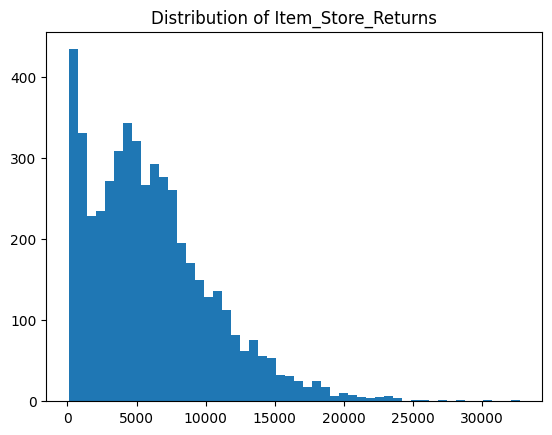

In [5]:
# Plot target distribution (before any transformation)
plt.hist(train_df["Item_Store_Returns"], bins=50)
plt.title("Distribution of Item_Store_Returns")
# plt.savefig("target_distribution_before_transform.png")
plt.show()
plt.close()

#### Check for skewness and consider log transformation for the target
#### If the target distribution is still highly skewed after seeing the plot, uncomment the line below.
#### This transformation needs to be reversed for final predictions (np.expm1).
#### train_df['Item_Store_Returns'] = np.log1p(train_df['Item_Store_Returns'])

In [6]:
# 2. Enhanced Data Preprocessing (with more robust NaN handling and features)
def preprocess_data(df):
    # --- Missing Value Handling ---
    # Item_Weight: Impute with mean (numerical)
    if 'Item_Weight' in df.columns: # Check if column exists before trying to access
        df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

    # Store_Size: Impute with 'Unknown' (categorical) - consistent with prompt info
    df['Store_Size'] = df['Store_Size'].fillna('Unknown')
    
    # Store_Location_Type: Impute with 'Unknown' (categorical) - often empty strings appear as NaN
    df['Store_Location_Type'] = df['Store_Location_Type'].fillna('Unknown')
    

    # --- Feature Engineering ---
    # Years_Operated: Already created, good feature
    df['Years_Operated'] = 2023 - df['Store_Start_Year']

    # Correcting zero visibility: if visibility is 0, replace with a small value or mean for calculation.
    # This avoids issues like division by zero or unrealistic representation.
    df['Item_Visibility'] = df['Item_Visibility'].replace(0, df['Item_Visibility'].mean())

    # Create Item_Visibility_Zero binary feature (indicates original zero visibility)
    df['Item_Visibility_Zero'] = (df['Item_Visibility'] == df['Item_Visibility'].mean()).astype(int)

    # Item_Price_Per_Weight: Ratio feature
    df['Item_Price_Per_Weight'] = df['Item_Price'] / df['Item_Weight']

    # Create interaction features between numerical columns
    df['Item_Weight_x_Visibility'] = df['Item_Weight'] * df['Item_Visibility']
    df['Item_Weight_x_Price'] = df['Item_Weight'] * df['Item_Price']
    df['Item_Visibility_x_Price'] = df['Item_Visibility'] * df['Item_Price']

    # Create polynomial features for key numerical columns (degree 2)
    df['Item_Weight_sq'] = df['Item_Weight']**2
    df['Item_Visibility_sq'] = df['Item_Visibility']**2
    df['Item_Price_sq'] = df['Item_Price']**2

    # Create interaction feature Item_Type_Store_Type
    # Ensure base columns are treated as strings for concatenation and handle potential NaNs
    if 'Item_Type' in df.columns and 'Store_Type' in df.columns:
        df['Item_Type_Store_Type'] = df['Item_Type'].astype(str) + "_" + df['Store_Type'].astype(str)
    else:
        print(f"Warning: 'Item_Type' or 'Store_Type' not found in dataframe. 'Item_Type_Store_Type' will not be created.")


    # --- Categorical Encoding ---
    # Apply LabelEncoder to all identified categorical columns
    cat_cols_to_encode = [
        "Item_Sugar_Content",
        "Item_Type",
        "Store_Size",
        "Store_Location_Type",
        "Store_Type",
    ]
    # Only add 'Item_Type_Store_Type' to the list if it was successfully created
    if 'Item_Type_Store_Type' in df.columns:
        cat_cols_to_encode.append('Item_Type_Store_Type')

    for col in cat_cols_to_encode:
        try:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
        except Exception as e:
            print(f"Error encoding column {col}: {e}. Skipping this column for Label Encoding.")
    
    return df




print("Applying enhanced preprocessing to dataframes...")
train_df = preprocess_data(train_df.copy())
test_df = preprocess_data(test_df.copy())

Applying enhanced preprocessing to dataframes...


In [7]:
# 3. Prepare Data for Training and Test (post-preprocessing and column alignment)
# Drop ID columns for feature matrix X
X = train_df.drop(["Item_Store_Returns", "Item_Store_ID", "Store_ID", "Item_ID"], axis=1)
y = train_df["Item_Store_Returns"]

# Prepare test features (same processing as X)
test_features_raw = test_df.drop(["Item_Store_ID", "Store_ID", "Item_ID"], axis=1)

# Align columns between X and test_features after all preprocessing and before imputation
# This is crucial for consistency, especially if certain feature engineering steps
# (e.g., creating binary flags based on values) result in different columns
# or different numbers of unique categories for LabelEncoder between train and test.
# However, given our current preprocess_data, new columns are created consistently.
# The main alignment needed is ensuring the final set of columns are identical and in order.

# Impute any remaining NaNs in X and test_features_raw (e.g., from division by zero if it happened)
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
test_features_imputed = pd.DataFrame(imputer.transform(test_features_raw), columns=test_features_raw.columns)

print("Remaining NaNs in training features after final imputation:", X_imputed.isna().sum().sum())
print("Remaining NaNs in test features after final imputation:", test_features_imputed.isna().sum().sum())

# Ensure columns in test_features_imputed are the same as X_imputed. If not, missing columns will be 0, extra will be dropped.
missing_cols_in_test = set(X_imputed.columns) - set(test_features_imputed.columns)
for col in missing_cols_in_test:
    test_features_imputed[col] = 0 # Add missing columns to test set with default 0

extra_cols_in_test = set(test_features_imputed.columns) - set(X_imputed.columns)
if extra_cols_in_test: # Only drop if there are extra columns
    test_features_imputed = test_features_imputed.drop(columns=list(extra_cols_in_test))

# Reorder test_features_imputed columns to match X_imputed.columns
test_features_aligned = test_features_imputed[X_imputed.columns]

X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


Remaining NaNs in training features after final imputation: 0
Remaining NaNs in test features after final imputation: 0


In [8]:
# 4. Define and Train All Models (using Pipelines for scaling sensitive models)
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0),
    "SVR": Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel="rbf", C=1.0, epsilon=0.1))]),
    "ElasticNet": Pipeline([('scaler', StandardScaler()), ('enet', ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42))]),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

results = {}
trained_models = {} # Store trained models (which might be pipelines)

for name, model in models.items():
    print(f"Training {name}...")
    # All models (including pipelines) now take X_train (raw imputed data) as input
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    results[name] = rmse
    trained_models[name] = model # Save the trained model/pipeline
    print(f"{name} RMSE: {rmse:.2f}")

Training Random Forest...
Random Forest RMSE: 3135.12
Training XGBoost...
XGBoost RMSE: 3256.72
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 3992, number of used features: 18
[LightGBM] [Info] Start training from score 6103.729892
LightGBM RMSE: 3067.32
Training CatBoost...
CatBoost RMSE: 3063.91
Training SVR...
SVR RMSE: 4387.20
Training ElasticNet...
ElasticNet RMSE: 3196.88
Training Gradient Boosting...
Gradient Boosting RMSE: 2989.78


In [9]:
# 5. Voting Ensemble (Automatically pick top 3 models)
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["RMSE"])
results_df.sort_values(by="RMSE", inplace=True)
top_3_model_names = results_df.head(3).index.tolist()

# Prepare models for VotingRegressor using their trained instances
ensemble_estimators = []
for name in top_3_model_names:
    ensemble_estimators.append((name.lower().replace(' ', '_'), trained_models[name]))


print(f"Building Voting Ensemble with Top 3 Models: {top_3_model_names}")
ensemble = VotingRegressor(ensemble_estimators)
ensemble.fit(X_train, y_train) # Train ensemble on raw X_train, pipelines within handle scaling
ensemble_preds = ensemble.predict(X_val)
ensemble_rmse = np.sqrt(mean_squared_error(y_val, ensemble_preds))
results["Voting Ensemble (Top 3)"] = ensemble_rmse
print(f"Voting Ensemble RMSE (Top 3 Models): {ensemble_rmse:.2f}")


Building Voting Ensemble with Top 3 Models: ['Gradient Boosting', 'CatBoost', 'LightGBM']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2608
[LightGBM] [Info] Number of data points in the train set: 3992, number of used features: 18
[LightGBM] [Info] Start training from score 6103.729892
Voting Ensemble RMSE (Top 3 Models): 3009.98


In [10]:
# 6. Save Final Results (including ensemble)
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["RMSE"])
results_df.sort_values(by="RMSE", inplace=True)
results_df.to_csv("model_comparison_results.csv")
print("Model comparison saved to 'model_comparison_results.csv'")

Model comparison saved to 'model_comparison_results.csv'


In [11]:
# 7. Feature Importance (for the single best model or an interpretable model)
best_single_model_name = results_df.index[0] # Get the best model name from the sorted results
best_model_for_viz = trained_models[best_single_model_name]

In [12]:
# Adjust for pipelines for feature importance
if isinstance(best_model_for_viz, Pipeline):
    # Get the actual regressor from the pipeline
    final_estimator = best_model_for_viz.named_steps[best_model_for_viz.steps[-1][0]]
else:
    final_estimator = best_model_for_viz

if hasattr(final_estimator, "feature_importances_"):
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, final_estimator.feature_importances_)
    plt.title(f"{best_single_model_name} Feature Importance")
    plt.tight_layout()
    plt.savefig(f"{best_single_model_name.lower().replace(' ', '_')}_feature_importance.png")
    plt.close()
elif hasattr(final_estimator, 'coef_'):
    # For linear models like ElasticNet and SVR (if kernel is linear), use coef_ as importance proxy
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, np.abs(final_estimator.coef_)) # Use absolute value for magnitude of importance
    plt.title(f"{best_single_model_name} Feature Coefficients (Absolute Value)")
    plt.tight_layout()
    plt.savefig(f"{best_single_model_name.lower().replace(' ', '_')}_coefficients.png")
    plt.close()
elif best_single_model_name == "CatBoost":
    # CatBoost has get_feature_importance method
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, final_estimator.get_feature_importance()) 
    plt.title(f"{best_single_model_name} Feature Importance")
    plt.tight_layout()
    plt.savefig(f"{best_single_model_name.lower().replace(' ', '_')}_feature_importance.png")
    plt.close()
else:
    print(f"Feature importance/coefficients not available for {best_single_model_name}.")


In [13]:
# 8. Generate Final Predictions (using the overall best model: either best single or ensemble)
# Compare the best single model's RMSE with the ensemble's RMSE
# Get the RMSE of the very best model (could be a single model or ensemble)
overall_best_model_name = results_df.index[0]
if overall_best_model_name == "Voting Ensemble (Top 3)":
    final_model_to_use = ensemble
    print(f"Using Voting Ensemble for final predictions.")
else:
    final_model_to_use = trained_models[overall_best_model_name]
    print(f"Using best single model ({overall_best_model_name}) for final predictions.")

# Predict on test data using the aligned test_features
# The final_model_to_use (whether pipeline or raw model) handles its own transformations if any
test_preds = final_model_to_use.predict(test_features_aligned)

# If target was log-transformed, reverse the transformation here
# if 'Item_Store_Returns' in train_df.columns and 'Item_Store_Returns_original' in train_df.columns:
#    test_preds = np.expm1(test_preds)

submission = pd.DataFrame(
    {
        "Item_Store_ID": test_df["Item_Store_ID"], # Use original test_df for Item_Store_ID
        "Item_Store_Returns": test_preds,
    }
)
# submission.to_csv("final_submission.csv", index=False)
# print("Final predictions saved to 'final_submission.csv'")

# Generate timestamp string
timestamp = datetime.now().strftime("%Y-%m-%d_%H%M")

# Create filename with timestamp
filename = f"output/submission_{timestamp}.csv"

# Save to CSV
submission.to_csv(filename, index=False)
print(f"Predictions saved to '{filename}'")

Using best single model (Gradient Boosting) for final predictions.
Predictions saved to 'output/submission_2025-06-29_1804.csv'
